#### Let's dig in!

#### As always I'm always open to suggestions! Give me a thumbs up if you liked it!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

%matplotlib inline

In [2]:
data = pd.read_csv("../input/index.csv")
data.head()

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN


### Data sanity check!

In [3]:
data.isnull().sum()

Year                              0
Month                             0
Day                               0
Federal Funds Target Rate       442
Federal Funds Upper Target      801
Federal Funds Lower Target      801
Effective Federal Funds Rate    152
Real GDP (Percent Change)       654
Unemployment Rate               152
Inflation Rate                  194
dtype: int64

#### Looks like there are too many null values! 

## Inflation

In [4]:
inspect_inflation = data.groupby('Year')['Inflation Rate'].mean().to_frame().reset_index()
inspect_inflation.columns = ['Year', 'Mean_inflation']

inspect_inflation.head()

,Year,Mean_inflation
0,1954,NaN
1,1955,NaN
2,1956,NaN
3,1957,NaN
4,1958,2.283333


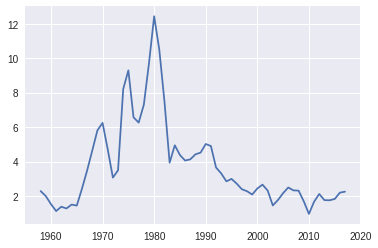

In [5]:
plt.plot(inspect_inflation['Year'], inspect_inflation['Mean_inflation'])

In [6]:
data['Inflation Rate'].isnull().sum()

194

let's employ two different ways to impute the data here. 
    - Chart observation. 
    - Imputing the mean of that year. 

In [7]:
#Looking at the plot above I think it will be a safe assumption to replace Nan of 1954-1957 to be around 3. 
data.loc[data['Year'] < 1958, 'Inflation Rate'] = 3.00

Remaining null are...

In [8]:
data['Inflation Rate'].isnull().sum()

152

In [9]:
Inflationrate_lookup = data.groupby('Year')['Inflation Rate'].mean().to_frame().reset_index()
Inflationrate_lookup.columns = ['Year', 'Mean_inflation']

In [10]:
Inflationrate_lookup.head()

,Year,Mean_inflation
0,1954,3.000000
1,1955,3.000000
2,1956,3.000000
3,1957,3.000000
4,1958,2.283333


In [11]:
def impute_Inflationrate(row):
    #You need to impute the row, takeing statistics from dataframe.
    global Inflationrate_lookup
    return_value = row['Inflation Rate']
    if(np.isnan(return_value)):
        return_value = Inflationrate_lookup.loc[Inflationrate_lookup.Year == row['Year'], "Mean_inflation"]
    return(return_value)
    
    
    
data['Inflation Rate'] = data.apply(lambda row: impute_Inflationrate(row) , axis = 1)
data['Inflation Rate'] = data['Inflation Rate'].astype("float64")


## Unemployment

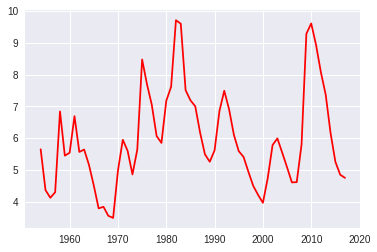

In [12]:
inspect_unemployment = data.groupby('Year')['Unemployment Rate'].mean().to_frame().reset_index()
inspect_unemployment.columns = ['Year', 'Mean_Unemployment']
plt.plot(inspect_unemployment['Year'], inspect_unemployment['Mean_Unemployment'], color = "red")

#### Unemployment imputation. 

In [13]:
Unemploymentrate_lookup = data.groupby('Year')['Unemployment Rate'].mean().to_frame().reset_index()
Unemploymentrate_lookup.columns = ['Year', 'Mean_Unemployment']

data['Unemployment Rate'].isnull().sum()

152

In [14]:
def impute_Unemploymentrate(row):
    #You need to impute the row, takeing statistics from dataframe.
    global Unemploymentrate_lookup
    return_value = row['Unemployment Rate']
    if(np.isnan(return_value)):
        return_value = Unemploymentrate_lookup.loc[Unemploymentrate_lookup.Year == row['Year'], "Mean_Unemployment"]
    return(return_value)
    
    
    
data['Unemployment Rate'] = data.apply(lambda row: impute_Unemploymentrate(row) , axis = 1)
data['Unemployment Rate'] = data['Unemployment Rate'].astype("float64")
data['Unemployment Rate'].isnull().sum()

0

### Let's Plot on a single graph. 

In [15]:
inspect_inflation = data.groupby('Year')['Inflation Rate'].mean().to_frame().reset_index()
inspect_inflation.columns = ['Year', 'Mean_inflation']

inspect_unemployment = data.groupby('Year')['Unemployment Rate'].mean().to_frame().reset_index()
inspect_unemployment.columns = ['Year', 'Mean_Unemployment']


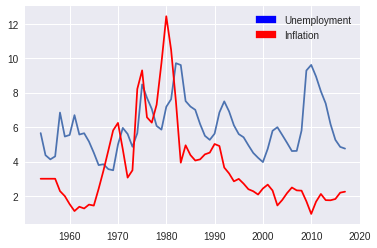

In [16]:
#Doing the same as above. 
import matplotlib.patches as mpatches

plt.plot(inspect_unemployment['Year'], inspect_unemployment['Mean_Unemployment'])
blue_patch = mpatches.Patch(color='blue', label='Unemployment')


plt.plot(inspect_inflation['Year'], inspect_inflation['Mean_inflation'], color = "red")
red_patch = mpatches.Patch(color='red', label='Inflation')
plt.legend(handles=[blue_patch, red_patch])


### Inference: It looks like Unemployment follows inflation. That is, there seeems to be a strong correlation between Unemployment and drag of 6-12 months of Inflation